In [149]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [151]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [153]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [154]:
df.duplicated().sum()

0

In [155]:
df.describe()


,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [156]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [157]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [158]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [159]:
cols = [ 'Overview', 'Original_Language', 'Poster_Url' ]

In [160]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [161]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [162]:
def categorize_col(df, col , labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [163]:
labels = [ 'not_popular', 'below_avg', 'average', 'popular' ]

categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [164]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [165]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [166]:

df['Genre'] = df['Genre'].apply(lambda x: x if isinstance(x, list) else str(x).split(', ') if pd.notnull(x) else [])
df = df.explode('Genre').reset_index(drop=True)
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [167]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

# Data Visualization


In [168]:
df['Genre'].describe()


count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

# What is the most frequent genre of movies released on Netflix ?

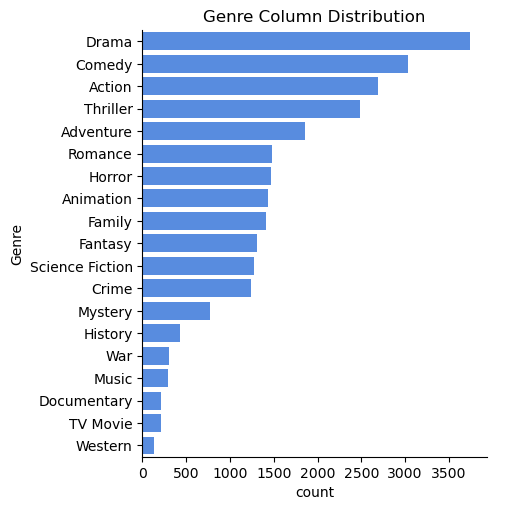

In [169]:
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().index,
            color = '#4287f5')

plt.title('Genre Column Distribution')
plt.show()

# Which has the highest votes in avg column ?

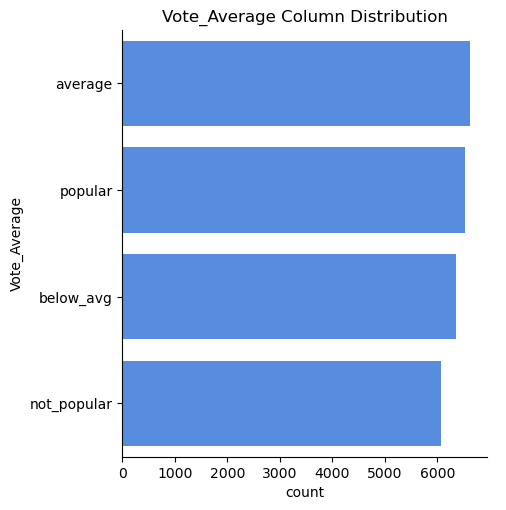

In [170]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', 
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')

plt.title('Vote_Average Column Distribution')
plt.show()

# What movie got the highest popularity ? what its genre ?

In [171]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# What movie got the lowest popularity ? What its genre ?


In [172]:
df[df['Popularity'] ==  df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


# Which year has the most flimmed movies ?

<function matplotlib.pyplot.show(close=None, block=None)>

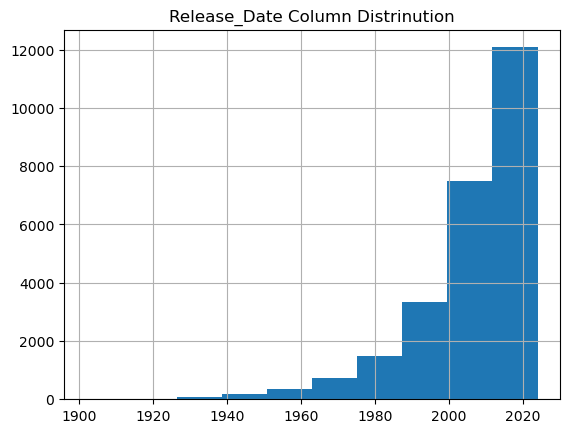

In [173]:
df['Release_Date'].hist()
plt.title('Release_Date Column Distrinution')
plt.show

# Conclusion
Q.1] What is the most frequent genre of movies in dataset?
Ans- Drama genre is the most frequent genre in our dataset and has appeared more than 14% of times among 19 other genres.

Q.2] What genre has the highest votes ?
Ans- We have 25.5% of our dataset with popular vote (6250 rows). Drama again gets the highest popularity among fans being more than 18.5% of all movies.

Q.3]What movie got the highest popularity ? what its genre ?
Ans- Spider Man: No Way Home has the highest popularity rate in our dataset and it has genres of action, adventure and science fiction.

Q.4]What movie got the lowest popularity ? What its genre ?
Ans- The United States vs. Billie Holiday and Threads has the lowest popularity and it has genres of drama , history , music and science fiction.

Q.5]Which year has the most flimmed movies ?
Ans- Year 2020 has the highest filmmed movies.